# Qiskit

Ahora realizaremos el mismo procedimiento pero con qiskit. Se evitarán repetición de explicaciones para hacer más amena la memoria

In [1]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
import numpy as np

## Algoritmo de Deutsch

In [2]:
def I(qc):
    return

In [3]:
def CNOT(qc):
    qc.cx(0,1)

In [4]:
def NOT(qc):
    qc.x(1)

In [5]:
def NOTCNOT(qc):
    qc.x(0)
    qc.cx(0,1)
    qc.x(0)

In [6]:
qc = QuantumCircuit(2,1)
qc.x(1)
qc.h(0)
qc.h(1)

qc.barrier()

NOTCNOT(qc)

qc.barrier()

qc.h(0)
qc.measure([0], [0])
qc.draw()

┌───┐      ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ├───┤┌───┐ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘└───┘ ░      └───┘      ░       ║ 
c: 1/═════════════════════════════════════╩═
                                          0

### Simulaciones

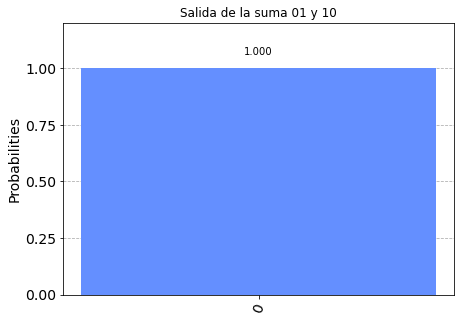

In [7]:
qc = QuantumCircuit(2,1)
qc.x(1)
qc.h(0)
qc.h(1)

qc.barrier()

NOT(qc)

qc.barrier()

qc.h(0)
qc.measure([0], [0])

# Simulamos el circuito 1000 veces y mostramos el resultado en un histograma
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
qobj = assemble(qc)


result = qasm_sim.run(qc).result()

counts = result.get_counts(qc)
plot_histogram(counts, title='Salida de la suma 01 y 10')

## Algoritmo de Deutsch-Jozsa

In [8]:
def prepare(n):
    qc = QuantumCircuit(n + 1,n)
    qc.x(n)

    for i in range(n + 1):
        qc.h(i)
        
    return qc

In [9]:
def end(qc, n):

    for i in range(n):
        qc.h(i)
        
    lista = list(range(n))
    qc.measure(lista,lista[::-1])

In [10]:
def ejercicio1(qc, n):
    for i in range(n):
        qc.cx(i,n)
        qc.x(i)
        qc.cx(i,n)

In [11]:
def cnots(qc, n):
    for i in range(n):
        qc.cx(i,n)

In [12]:
def Rcnots(qc, n):
    for i in range(n):
        qc.cx((n-1) - i,n)

In [13]:
def ejercicio2(qc, n):
        qc.cx(2,n)
        qc.cx(1,n)
        qc.ccx(0,1,n)

In [15]:
n = 3

qc = prepare(n)

qc.barrier()

ejercicio1(qc, n)

qc.barrier()

end(qc, n)

qc.draw()

┌───┐      ░      ┌───┐                                    ░ ┌───┐┌─┐   »
q_0: ┤ H ├──────░───■──┤ X ├──■─────────────────────────────────░─┤ H ├┤M├───»
     ├───┤      ░   │  └───┘  │       ┌───┐                     ░ ├───┤└╥┘┌─┐»
q_1: ┤ H ├──────░───┼─────────┼────■──┤ X ├──■──────────────────░─┤ H ├─╫─┤M├»
     ├───┤      ░   │         │    │  └───┘  │       ┌───┐      ░ ├───┤ ║ └╥┘»
q_2: ┤ H ├──────░───┼─────────┼────┼─────────┼────■──┤ X ├──■───░─┤ H ├─╫──╫─»
     ├───┤┌───┐ ░ ┌─┴─┐     ┌─┴─┐┌─┴─┐     ┌─┴─┐┌─┴─┐└───┘┌─┴─┐ ░ └───┘ ║  ║ »
q_3: ┤ X ├┤ H ├─░─┤ X ├─────┤ X ├┤ X ├─────┤ X ├┤ X ├─────┤ X ├─░───────╫──╫─»
     └───┘└───┘ ░ └───┘     └───┘└───┘     └───┘└───┘     └───┘ ░       ║  ║ »
c: 3/═══════════════════════════════════════════════════════════════════╩══╩═»
                                                                        2  1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«q_3: ─╫─
«      ║ 
«c: 3/═╩═
«      0

In [16]:
n = 3

qc = prepare(n)

qc.barrier()

ejercicio2(qc, n)

qc.barrier()

end(qc, n)

qc.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░─────────────■───░─┤ H ├┤M├──────
     ├───┤      ░             │   ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░────────■────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░        │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───■────┼────┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          2  1  0

### Simulaciones

Solo en aquellos oraculos cuya salida es constante su salida es siempre |0>

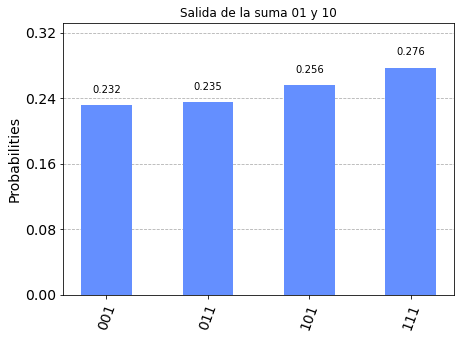

In [17]:
n = 3

qc = prepare(n)

qc.barrier()

ejercicio2(qc, n)

qc.barrier()

end(qc, n)

# Simulamos el circuito 1000 veces y mostramos el resultado en un histograma
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
qobj = assemble(qc)


result = qasm_sim.run(qc).result()

counts = result.get_counts(qc)
plot_histogram(counts, title='Salida de la suma 01 y 10')

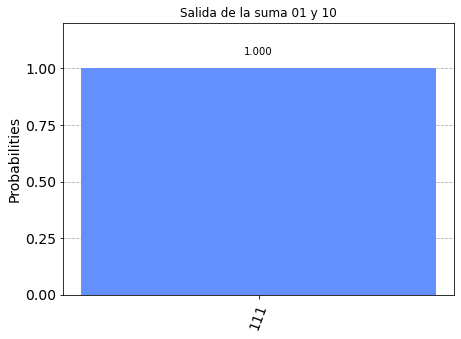

In [18]:
n = 3

qc = prepare(n)

qc.barrier()

cnots(qc, n)

qc.barrier()

end(qc, n)

# Simulamos el circuito 1000 veces y mostramos el resultado en un histograma
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
qobj = assemble(qc)


result = qasm_sim.run(qc).result()

counts = result.get_counts(qc)
plot_histogram(counts, title='Salida de la suma 01 y 10')

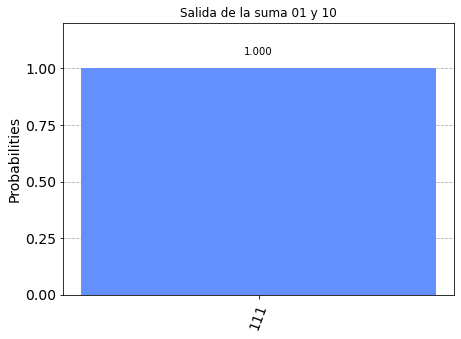

In [19]:
n = 3

qc = prepare(n)

qc.barrier()

Rcnots(qc, n)

qc.barrier()

end(qc, n)

# Simulamos el circuito 1000 veces y mostramos el resultado en un histograma
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
qobj = assemble(qc)


result = qasm_sim.run(qc).result()

counts = result.get_counts(qc)
plot_histogram(counts, title='Salida de la suma 01 y 10')

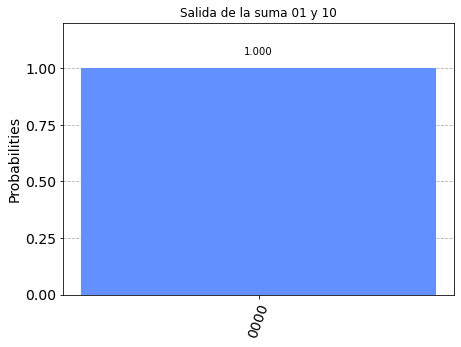

In [20]:
n = 4

qc = prepare(n)

qc.barrier()

ejercicio1(qc, n)

qc.barrier()

end(qc, n)

# Simulamos el circuito 1000 veces y mostramos el resultado en un histograma
qasm_sim = Aer.get_backend('qasm_simulator')
qc = transpile(qc, qasm_sim)
qobj = assemble(qc)


result = qasm_sim.run(qc).result()

counts = result.get_counts(qc)
plot_histogram(counts, title='Salida de la suma 01 y 10')

### Ejecuciones en backends reales

Como podemos comprobar en estas simulaciones echas en backends reales, para un oráculo constante como ejercicio1() vemos que las salidas son mayoritariamente (66.7%) |0000>, aunque haya errores debido al ruido. Por otro lado en un oraculo no constante como Rcnots() este no es el caso habiendo |0000> un 0.5% de las veces y dominando la salida |1111>

In [92]:
n = 4
qc = prepare(n)
qc.barrier()
ejercicio1(qc, n)
qc.barrier()
end(qc, n)

In [93]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
IBMQ.save_account('your account', overwrite=True)
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(t_qc)
job = backend.run(qobj)

least busy backend:  ibmq_quito


In [94]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


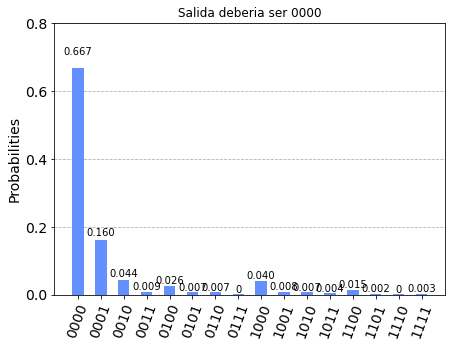

In [95]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc), title='Salida deberia ser 0000')

In [83]:
n = 4
qc = prepare(n)
qc.barrier()
Rcnots(qc, n)
qc.barrier()
end(qc, n)

In [84]:
# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(t_qc)
job = backend.run(qobj)

least busy backend:  ibmq_quito


In [85]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


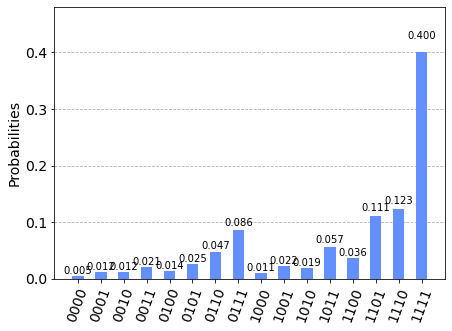

In [88]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))